<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/COMP90049/Week%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning, 2023

## Week 5 - Naive Bayes and the metrics

- Hold-out and Cross-validation
- Confusion Matrix
- Naive Bayes revisited

---
## Theoretical questions



### Q1: How is holdout evaluation different to cross-validation evaluation? What are some reasons we would prefer one strategy over the other?

- Hold-out: partition the data into a training set and a test set. We build the model on the former and evaluate on the latter.
- Cross-validation: same as above, but a number of times, where each iteration uses one partition of the data as a test set and the rest as a training set (and the partition is different each time).

Holdout is subject to some random variation, depending on which instances are assigned to the training data, and which are assigned to the test data. Any instance that forms part of the model is excluded from testing, and vice versa.

Cross validation can solve the above problems, but takes more time to do so. So choosing a preference will depends on how much time you want to use.

### Q2
 A confusion matrix is a summary of the performance of a (supervised) classifier over a set of development (“test”) data, by counting the various instances

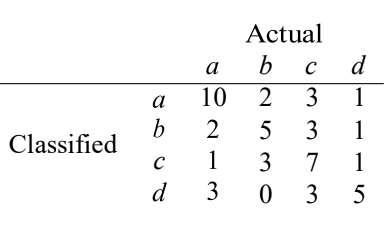

#### (i). Calculate the classification accuracy of the system. Find the error rate for the system.

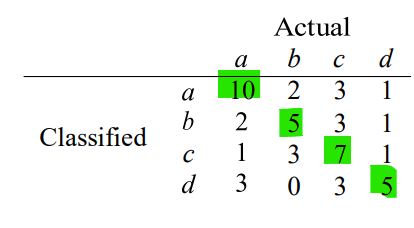

Accuracy is just the sum of the green bits divided by the sum of all elements in the matrix. You should get 54%.

Error rate is just `100% - accuracy`, which you will get 46%.

#### (ii). Calculate the precision, recall, and F-score (where β = 1) for class d.

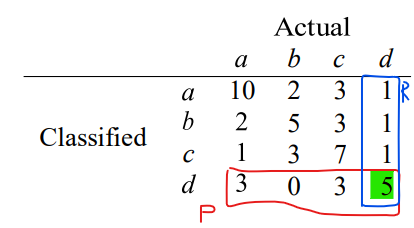

You are divding the correct guesses over the sums (wrapped in red and blue for percision and recall respectively). You should get around 45% percision and 62% recall.

And you can calculate F-score with $\beta=1$ (also called F-1 score) as $F_1 = \frac{(1+\beta^2)PR}{\beta^2P+R}=\frac{2PR}{P+R} \approx 53\%$

#### (iii). Why can’t we do this for the whole system? How can we consider the whole system?

- Percision and recall are used on a single class, ususally on a specific class of interest.
- To consider all, the metrics have to be done for each class then aggregare together.
- You have learnt some averaging methods: micro and macro average
- Aggregation choice depends on what you want:
  - Macro might be good to oversee the whole system behavior, which includes small groups as it treats all class equally.
  - Micro might be good to see the main system behaviors (in large group), as it is mostly affected by large groups.

### Question 3
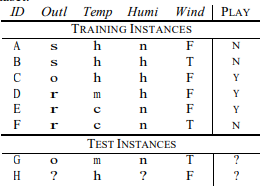


#### i. Describe the test and train instances
<details>
    <summary>Answer</summary>
    Instances A,B,C,D,E and F are our train instances (or observations) in this dataset, and the instances G and H that do not have a label are our test instances.
</details>

#### ii. Build a Naïve Bayes model for the given training instances.

You are just collecting the prior probabilities... Sanity check: 2 (number of labels)
- P(Play = Y) = 0.5
- P(Play = N) = 0.5

...and conditional probabilities. Sanity check: $(3+3+2+2)\times 2$ (number of values in each column * number of labels)
- P(Outl = s | N) = 2/3
- P(Outl = o | N) = 0
- P(Outl = r | N) = 1/3

  - P(Outl = s | Y) = 0
  - P(Outl = o | Y) = 1/3
  - P(Outl = r | Y) = 2/3

- P(Temp = h | N) = 2/3
- P(Temp = m | N) =  0
- P(Temp = c | N) = 1/3

  - P(Temp = h | Y) = 1/3
  - P(Temp = m | Y) = 1/3
  - P(Temp = c | Y) = 1/3

- P(Humi = n | N) = 2/3
- P(Humi = h | N) = 1/3

  - P(Humi = n | Y) = 1/3
  - P(Humi = h | Y) = 2/3

- P(Wind = T | N) = 2/3
- P(Wind = F | N) = 1/3

  - P(Wind = T | Y) = 0
  - P(Wind = F | Y) = 1


### Question 4
Using the Naïve Bayes model that you developed in question 4, classify the given test instances
- No smoothing
- Epsilon smoothing (replace 0 with a small value)
- Laplace smoothing with $\alpha=1$ ($P_i = \frac{x_i+\alpha}{N + \alpha d}$)

Remember: `d` represents the number of instances with the given label in the dataset. If you're calculating `P(something|x)`, `d` is the number of training instances with label `x`.

#### Answer: No smoothing
G:
- $P(G=N) = P(N) \times P(Outl=o|N)P(Temp=m|N)P(Humi=n|N)P(Wind=T|N) \\= 0.5 \times 0 \times 0 \times 2/3 \times 2/3 \\= 0$
- $P(G=Y) = P(Y) \times P(Outl=o|Y)P(Temp=m|Y)P(Humi=n|Y)P(Wind=T|Y) \\= 0.5 \times 1/3 \times 1/3 \times 1/3 \times 0 \\= 0$

H: Ignore the missing instances
- $P(H=N) = P(N) \times P(Temp=h|N)P(Wind=F|N) \\= 1/2 \times 2/3 \times 1/3 \\= 1/9$
- $P(H=N) = P(Y) \times P(Temp=h|Y)P(Wind=F|Y) \\= 1/2 \times 1/3 \times 1 \\= 1/6$

#### Answer: Epsilon smoothing
Just replace any 0 with $\epsilon$

G:
- $P(G=N) = P(N) \times P(Outl=o|N)P(Temp=m|N)P(Humi=n|N)P(Wind=T|N) \\= 0.5 \times \epsilon \times \epsilon \times 2/3 \times 2/3 \\= 2\epsilon^2/9$
- $P(G=Y) = P(Y) \times P(Outl=o|Y)P(Temp=m|Y)P(Humi=n|Y)P(Wind=T|Y) \\= 0.5 \times 1/3 \times 1/3 \times 1/3 \times \epsilon \\= \epsilon/54$

$\epsilon/54 > 2\epsilon^2/9$ for small $\epsilon$ (Rule of thumb: The more $\epsilon$ in it, the smaller)

So Y is more likely for G
<details>
    <summary>We know the answer for H already. Why?</summary>
   No 0 probabilities in the calculation
</details>

#### Answer: Laplace smoothing (let $\alpha=1$)
- Look at the `Outl` attribute: it has 3 different values (s,o,r)

- So $P(Outl = o|Y) = \frac{1+\alpha}{3+3\alpha}=\frac{1+1}{3+3} = \frac{2}{6}$

Try the same for other probabilities in the equation.

The rest of the answer, which I am too lazy to type out:

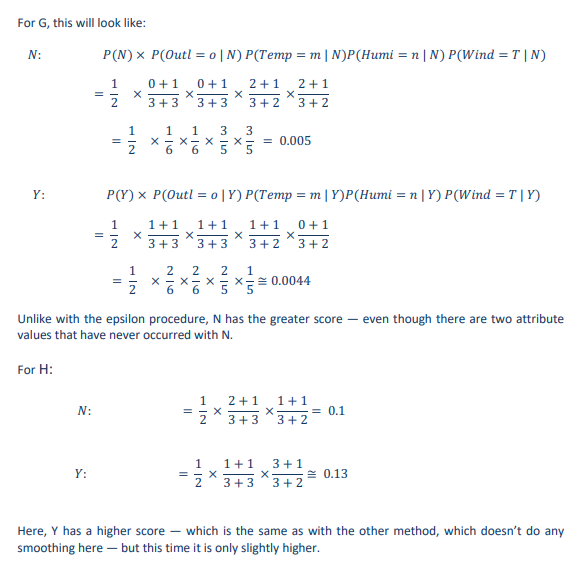

### Question 5: Gaussian Naive Bayes

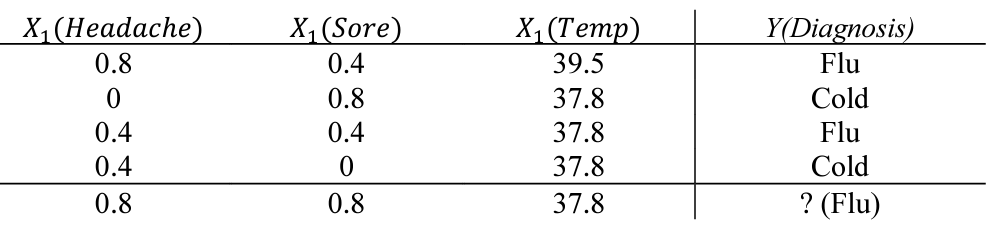

#### (i) Build a Naïve Bayes model for the given training instances

Sanity check:
- 2 labels -> 2 likelihoods
- $n_{features} \times n_{labels} = 3 \times 2 = 6$ normal distributions.

Answer:

Get the likelihoods: P(Flu) = P(Cold) = 0.5

Now get the normal distributions $N(\mu,\sigma)$:
- $\mu = \frac{1}{N}\sum_i x_i$
- $\sigma = \sqrt{\frac{\sum_i (x_i-\mu)^2}{N}}$

Example:
- $\mu_{headache|flu} = (0.8+0.4)/2 = 0.6$
- $\sigma_{headache|flu} = \sqrt{\frac{(0.8-0.6)^2+(0.4-0.6)^2}{2}} = 0.2$

|Label|Headache|Sore|Temp|
|---|---|---|---|
|Flu|P(headache \| flu) = N(0.6,0.2)|N(0.4,0)|N(38.7,0.85)|
|Cold|P(headache \| cold) = N(0.2,0.2)|N(0.4,0.4)|N(37.8,0)|

#### (ii) Estimate the probability of the test instance
Assume $P(sore = K|flu) = P(temp = L|cold) = 1 \,\forall\, K,L$

Probability for each observation can be calculated as follows:
$$\frac{1}{\sqrt{2\pi\sigma}}exp\Big[\frac{(x-\mu)^2}{2\sigma^2}\Big]$$

Then we got the following:

||P(diagnose)|Headache = 0.8|Sore = 0.8|Temp = 37.8|P(diagnose\|x) = $∏_P$|
|---|---|---|---|---|---|
Flu|0.5|1.21|1|0.28|0.17
Cold|0.5|0.02|0.6|1|0.006

We find that $P(flu|x) > P(cold|x)$ -> Label is `flu`

### Some useful tools for display: Confusion matrix and `seaborn` package

Helps you to see well on how the predictions look like!

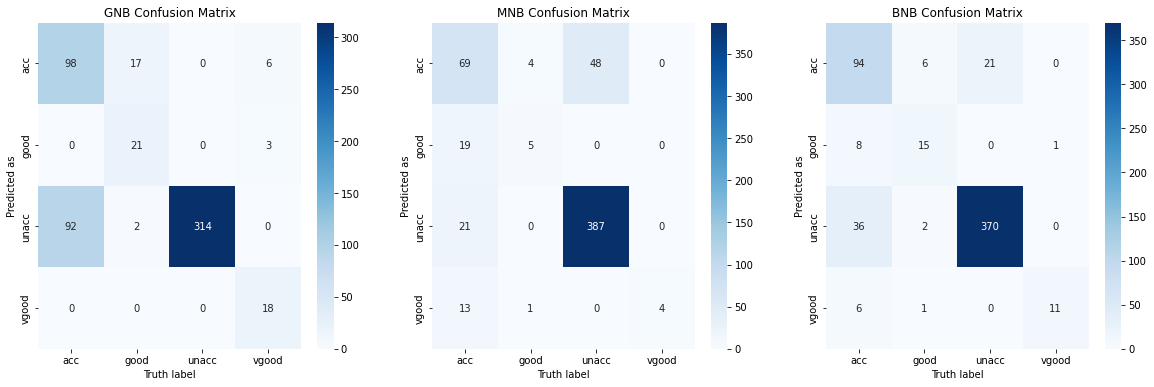

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

_, ax = plt.subplots(1,3,figsize=(20,6))

gnb_cf = confusion_matrix(y_test,gnb_predictions)
mnb_cf = confusion_matrix(y_test,mnb_predictions)
bnb_cf = confusion_matrix(y_test,bnb_predictions)
titles = ['GNB','MNB','BNB']

for i,cf in enumerate([gnb_cf,mnb_cf,bnb_cf]):
  sns.heatmap(cf, ax=ax[i],
              cmap = 'Blues',
              fmt = 'd',
              xticklabels=unique_labels,
              yticklabels=unique_labels,
              annot=True)
  ax[i].set_title(f'{titles[i]} Confusion Matrix')
  ax[i].set_xlabel('Truth label')
  ax[i].set_ylabel('Predicted as')

## Tutorial Solution Notebook

As per request, I will upload them to my Github repo. Give it a ⭐ so that I look cool 😎

<img src=https://api.qrcode-monkey.com/tmp/73255a40154113907484375f05a67dd6.svg?1692799621802 width = 300px>